In [38]:
from jobly.db.job_database import JobDatabase
from jobly.utils.scraper_utils import extract_job_role
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Initialize database connection
supabase = JobDatabase().supabase

# Get all job_titles from job_postings
response = (
    supabase.table("job_postings")
    .select("job_title")
    .execute()
)

In [3]:
# Convert to pandas DataFrame
df = pd.DataFrame(response.data)
print(f"Total job postings: {len(df)}")
print(f"\nFirst few job titles:")
df.head(10)

Total job postings: 1000

First few job titles:


,job_title
0,AI Product Engineer
1,.Net Developer
2,1 Senior Solutions Engineer
3,Senior Digital Support Engineer
4,Research Data Specialist (AI/ML)
5,Data Engineer
6,LEAD Integration Developer/Engineer (Azure)
7,Software Support Specialist
8,Software Engineer - AI/ML
9,"Site Reliability Engineering Manager, Google C..."


In [4]:
# Get value counts of job titles
job_title_counts = df['job_title'].value_counts()
print(f"\nUnique job titles: {len(job_title_counts)}")
print(f"\nTop 20 most common job titles:")
job_title_counts.head(20)


Unique job titles: 807

Top 20 most common job titles:


job_title
Software Engineer              29
Senior Software Engineer       16
Data Engineer                  15
Data Analyst                   15
Software Developer             12
Data Scientist                 12
Senior Software Developer       8
Senior Data Engineer            8
Full Stack Developer            8
Systems Engineer                8
AI Engineer                     6
Senior Full Stack Developer     6
Senior Developer                6
Machine Learning Engineer       5
Data Architect                  5
Senior Data Scientist           5
Lead Data Engineer              4
Principal Engineer              4
Analytics Engineer              3
Solution Architect              3
Name: count, dtype: int64

In [7]:
job_title_counts.to_csv("job_title_counts.csv")

In [26]:
print(job_title_counts)

job_title
Software Engineer                118
Data Engineer                     49
Software Developer                38
Data Scientist                    38
Stack Developer                   36
                                ... 
Data Tester                        1
Databricks Solution Architect      1
Process Minning Data Engineer      1
Hydrographic Surveyor              1
Agentic Ai Engineer                1
Name: count, Length: 489, dtype: int64


In [21]:
# Show full statistics
print("\nJob Title Statistics:")
print(f"Total job postings: {len(df)}")
print(f"Unique job titles: {df['job_title'].nunique()}")
print(f"Most common job title: '{job_title_counts.index[0]}' ({job_title_counts.iloc[0]} occurrences)")
print(f"\nJob titles appearing only once: {(job_title_counts == 1).sum()}")


Job Title Statistics:
Total job postings: 1000
Unique job titles: 489
Most common job title: 'Software Engineer' (118 occurrences)

Job titles appearing only once: 410


In [18]:
llm_analysis_responses = (
    supabase.table("job_postings")
    .select("llm_analysis")
    .execute()
)

skills_df = pd.DataFrame(llm_analysis_responses.data)

In [19]:
skills_df = skills_df.dropna()
skills_df.head(10)

,llm_analysis
4,{'skills': {'soft_skills': ['excellent communi...
5,"{'skills': {'soft_skills': ['communication', '..."
8,"{'skills': {'soft_skills': ['teamwork', 'probl..."
13,{'skills': {'technical_skills': ['data cleansi...
14,{'skills': {'experience_years': ['8–10 years o...
16,"{'skills': {'technical_skills': ['Python', 'Py..."
17,{'skills': {'soft_skills': ['Excellent communi...
21,{'skills': {'experience_years': ['3–5 years’ e...
22,{'skills': {'soft_skills': ['Strong communicat...
23,"{'skills': {'soft_skills': ['communication'], ..."


In [31]:
# Add these cells to your test.ipynb notebook after the current last cell
# Each comment block represents a new notebook cell

# ============================================================
# CELL 1: Extract and flatten skills from llm_analysis
# ============================================================
import json
from collections import Counter

# Parse the llm_analysis JSON and extract skills
soft_skills_list = []
technical_skills_list = []
tools_and_tech_list = []

for idx, row in skills_df.iterrows():
    if pd.isna(row['llm_analysis']):
        continue
    
    # Parse the JSON string if needed
    if isinstance(row['llm_analysis'], str):
        try:
            analysis = json.loads(row['llm_analysis'])
        except:
            continue
    else:
        analysis = row['llm_analysis']
    
    # Extract skills from the nested structure
    if 'skills' in analysis:
        skills = analysis['skills']
        
        # Extract soft skills
        if 'soft_skills' in skills and isinstance(skills['soft_skills'], list):
            soft_skills_list.extend(skills['soft_skills'])
        
        # Extract technical skills
        if 'technical_skills' in skills and isinstance(skills['technical_skills'], list):
            technical_skills_list.extend(skills['technical_skills'])
        
        # Extract tools and technologies
        if 'tools_and_technologies' in skills and isinstance(skills['tools_and_technologies'], list):
            tools_and_tech_list.extend(skills['tools_and_technologies'])

print(f"Total soft skills extracted: {len(soft_skills_list)}")
print(f"Total technical skills extracted: {len(technical_skills_list)}")
print(f"Total tools and technologies extracted: {len(tools_and_tech_list)}")


Total soft skills extracted: 905
Total technical skills extracted: 2461
Total tools and technologies extracted: 1636


In [32]:
# ============================================================
# CELL 2: Count occurrences of each skill type
# ============================================================
# Count soft skills
soft_skills_counter = Counter(soft_skills_list)
soft_skills_df = pd.DataFrame(soft_skills_counter.most_common(), columns=['Soft Skill', 'Count'])

# Count technical skills
technical_skills_counter = Counter(technical_skills_list)
technical_skills_df = pd.DataFrame(technical_skills_counter.most_common(), columns=['Technical Skill', 'Count'])

# Count tools and technologies
tools_counter = Counter(tools_and_tech_list)
tools_df = pd.DataFrame(tools_counter.most_common(), columns=['Tool/Technology', 'Count'])

print(f"\nUnique soft skills: {len(soft_skills_counter)}")
print(f"Unique technical skills: {len(technical_skills_counter)}")
print(f"Unique tools and technologies: {len(tools_counter)}")


Unique soft skills: 404
Unique technical skills: 1425
Unique tools and technologies: 850


In [34]:
# ============================================================
# CELL 3: Display top soft skills
# ============================================================
print("Top 20 Soft Skills:")
soft_skills_df.head(20)


Top 20 Soft Skills:


,Soft Skill,Count
0,communication,73
1,problem-solving,71
2,collaboration,58
3,mentoring,25
4,stakeholder management,22
5,leadership,21
6,teamwork,19
7,attention to detail,16
8,stakeholder engagement,11
9,problem solving,10


In [35]:
print("Top 20 Technical Skills:")
technical_skills_df.head(20)

Top 20 Technical Skills:


,Technical Skill,Count
0,Python,119
1,SQL,60
2,JavaScript,38
3,Java,27
4,C#,27
5,C++,24
6,AWS,23
7,React,20
8,TypeScript,17
9,R,15


In [36]:
print("Top 20 Tools and Technologies:")
tools_df.head(20)

Top 20 Tools and Technologies:


,Tool/Technology,Count
0,AWS,58
1,Azure,45
2,Power BI,34
3,Python,28
4,Git,23
5,Docker,20
6,Tableau,20
7,React,20
8,Terraform,18
9,TensorFlow,17


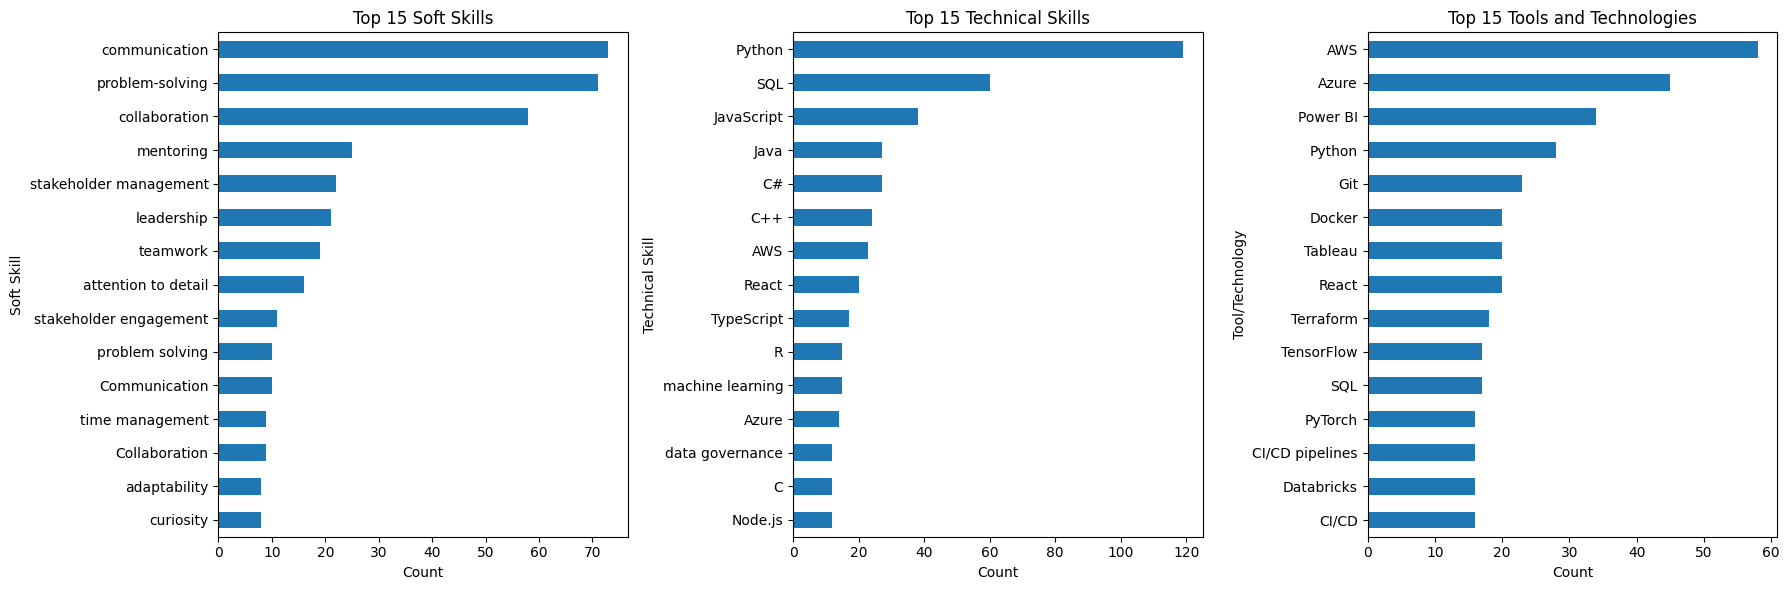

In [39]:
# ============================================================
# CELL 6: Visualize the top skills (optional)
# ============================================================
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Soft skills chart
soft_skills_df.head(15).plot(kind='barh', x='Soft Skill', y='Count', ax=axes[0], legend=False)
axes[0].set_title('Top 15 Soft Skills')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Soft Skill')
axes[0].invert_yaxis()

# Technical skills chart
technical_skills_df.head(15).plot(kind='barh', x='Technical Skill', y='Count', ax=axes[1], legend=False)
axes[1].set_title('Top 15 Technical Skills')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Technical Skill')
axes[1].invert_yaxis()

# Tools and technologies chart
tools_df.head(15).plot(kind='barh', x='Tool/Technology', y='Count', ax=axes[2], legend=False)
axes[2].set_title('Top 15 Tools and Technologies')
axes[2].set_xlabel('Count')
axes[2].set_ylabel('Tool/Technology')
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()

In [40]:
# ============================================================
# CELL 7: Summary statistics
# ============================================================
print("=" * 60)
print("SKILLS ANALYSIS SUMMARY")
print("=" * 60)
print(f"\nTotal job postings analyzed: {len(skills_df)}")
print(f"\nSOFT SKILLS:")
print(f"  - Total mentions: {len(soft_skills_list)}")
print(f"  - Unique skills: {len(soft_skills_counter)}")
print(f"  - Most common: {soft_skills_df.iloc[0]['Soft Skill'] if len(soft_skills_df) > 0 else 'N/A'} ({soft_skills_df.iloc[0]['Count'] if len(soft_skills_df) > 0 else 0} times)")
print(f"\nTECHNICAL SKILLS:")
print(f"  - Total mentions: {len(technical_skills_list)}")
print(f"  - Unique skills: {len(technical_skills_counter)}")
print(f"  - Most common: {technical_skills_df.iloc[0]['Technical Skill'] if len(technical_skills_df) > 0 else 'N/A'} ({technical_skills_df.iloc[0]['Count'] if len(technical_skills_df) > 0 else 0} times)")
print(f"\nTOOLS AND TECHNOLOGIES:")
print(f"  - Total mentions: {len(tools_and_tech_list)}")
print(f"  - Unique items: {len(tools_counter)}")
print(f"  - Most common: {tools_df.iloc[0]['Tool/Technology'] if len(tools_df) > 0 else 'N/A'} ({tools_df.iloc[0]['Count'] if len(tools_df) > 0 else 0} times)")
print("=" * 60)

SKILLS ANALYSIS SUMMARY

Total job postings analyzed: 283

SOFT SKILLS:
  - Total mentions: 905
  - Unique skills: 404
  - Most common: communication (73 times)

TECHNICAL SKILLS:
  - Total mentions: 2461
  - Unique skills: 1425
  - Most common: Python (119 times)

TOOLS AND TECHNOLOGIES:
  - Total mentions: 1636
  - Unique items: 850
  - Most common: AWS (58 times)


In [41]:
# ============================================================
# CELL 8: Export to CSV (optional)
# ============================================================
soft_skills_df.to_csv('soft_skills_counts.csv', index=False)
technical_skills_df.to_csv('technical_skills_counts.csv', index=False)
tools_df.to_csv('tools_and_technologies_counts.csv', index=False)
print("Exported skill counts to CSV files!")

Exported skill counts to CSV files!
